# Import module

The link to get [ImageAnalysis3](https://github.com/zhengpuas47/ImageAnalysis3) 

Or from the Zhuang lab archived [source_tools](https://github.com/ZhuangLab/Chromatin_Analysis_2020_cell/tree/master/sequential_tracing/source)

## ImageAnalysis3 and basic modules

In [1]:
%run "C:\Users\shiwei\Documents\ImageAnalysis3\required_files\Startup_py3.py"
sys.path.append(r"C:\Users\shiwei\Documents")

import ImageAnalysis3 as ia
from ImageAnalysis3 import *
from ImageAnalysis3.classes import _allowed_kwds

import h5py
import ast
import pandas as pd

print(os.getpid())

57544


## Chromatin_analysis_tools etc

See **functions** in the repository for [AnalysisTool_Chromatin](../../README.md)

In [2]:
# Chromatin_analysis_tools (ATC)
# Get path for the py containing functions
import os
import sys
import importlib
module_path =r'C:\Users\shiwei\Documents\AnalysisTool_Chromatin'
if module_path not in sys.path:
    sys.path.append(module_path)
    
# import relevant modules
import gene_selection 
importlib.reload(gene_selection)
import gene_to_loci
importlib.reload(gene_to_loci)
import gene_activity
importlib.reload(gene_activity)
import loci_1d_features
importlib.reload(loci_1d_features)  

import atac_to_loci
importlib.reload(atac_to_loci)

<module 'atac_to_loci' from 'C:\\Users\\shiwei\\Documents\\AnalysisTool_Chromatin\\atac_to_loci.py'>

# Define folders

In [3]:
# main folder for postanalysis
postanalysis_folder = r'L:\Shiwei\postanalysis_2024\v0'
# input files for postanalysis
input_folder = os.path.join(postanalysis_folder, 'resources_from_preprocess')

# output file to be generated
output_main_folder = os.path.join(postanalysis_folder, 'radial_position')

output_analysis_folder = os.path.join(output_main_folder, 'analysis')
output_figure_folder = os.path.join(output_main_folder, 'figures')

# make new folder if needed
make_output_folder = True

if make_output_folder and not os.path.exists(output_analysis_folder):
    os.makedirs(output_analysis_folder)
    print(f'Generating analysis folder: {output_analysis_folder}.')
elif os.path.exists(output_analysis_folder):
    print(f'Use existing analysis folder: {output_analysis_folder}.')
    
if make_output_folder and not os.path.exists(output_figure_folder):
    os.makedirs(output_figure_folder)
    print(f'Generating figure folder: {output_figure_folder}.')
elif os.path.exists(output_figure_folder):
    print(f'Use existing figure folder: {output_figure_folder}.')

Use existing analysis folder: L:\Shiwei\postanalysis_2024\v0\radial_position\analysis.
Use existing figure folder: L:\Shiwei\postanalysis_2024\v0\radial_position\figures.


# Plotting parameters

In [4]:
%matplotlib inline
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
import matplotlib.pyplot as plt
plt.rc('font', family='serif')
plt.rc('font', serif='Arial')

from ImageAnalysis3.figure_tools import _double_col_width, _single_col_width, _font_size, _ticklabel_size,_ticklabel_width

import seaborn as sns
sns.set_context("paper", rc={"font.size":_font_size,"axes.titlesize":_font_size+1,"axes.labelsize":_font_size})  

In [5]:
# Other required plotting parameters
_dpi = 300
_font_size = 7
_page_width = 5.5


## cell type color-codes

In [6]:
# cell labels from RNA-MERFISH and celltype prediction
selected_cell_labels = ['L2/3 IT','L4/5 IT','L5 IT','L6 IT','L5 ET','L5/6 NP','L6 CT','L6b',
                           'Sst','Pvalb','Lamp5','Sncg','Vip',
                           'Astro','Oligo','OPC','Micro','Endo','VLMC','SMC','Peri', 
                           #'other',
                          ]
# cell palette from RNA-MERFISH UMAP and stats
celltype_palette = {'Astro':'lightcoral', 
                    'Endo':'skyblue', 
                    'L2/3 IT':'gold', 
                    'L4/5 IT':'darkorange', 
                    'L5 ET':'mediumseagreen', 
                    'L5 IT':'aqua',
                    'L5/6 NP':'darkgreen',
                    'L6 CT':'brown',
                    'L6 IT':'magenta',
                    'L6b':'blue', 
                    'Lamp5':'orange', 
                    'Micro':'peachpuff',
                    'OPC':'thistle', 
                    'Oligo':'darkviolet',
                    'Peri':'sandybrown',
                    'Pvalb':'springgreen',
                    'SMC':'rosybrown',
                    'Sncg':'darkkhaki',
                    'Sst':'steelblue', 
                    'VLMC':'saddlebrown', 
                    'Vip':'red',
                    'other':'slategray'}


In [7]:
# this is the plotting order noted based on the snRNA transcriptional acitivty if needed
sorted_cellplot_order_byRNA = ['Micro', 'Oligo', 'Endo', 'OPC', 'Astro', 'Vip', 'Lamp5',
                  'L5/6 NP', 'Sst', 'Sncg', 'Pvalb', 'L4/5 IT', 'L6 CT',
                  'L6 IT', 'L6b', 'L2/3 IT', 'L5 IT', 'L5 ET']

# Load data relevant information

## load and format codebook

[merged codebook](../resources/merged_codebook.csv) as in the repository (merged for all DNA-MERFISH libraries)

In [8]:
# Load codebook 
codebook_fname = os.path.join(input_folder,'merged_codebook.csv')
codebook_df = pd.read_csv (codebook_fname, index_col=0)

# sort df by chr and chr_order
codebook_df = loci_1d_features.sort_loci_df_by_chr_order (codebook_df)
codebook_df.head()

,name,id,NDB_784,NDB_755,NDB_826,NDB_713,NDB_865,NDB_725,NDB_817,NDB_710,...,NDB_479,NDB_562,NDB_608,NDB_460,NDB_563,NDB_592,NDB_368,NDB_436,NDB_629,NDB_604
0,1:3742742-3759944,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1:6245958-6258969,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1:8740008-8759916,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1016,1:9627926-9637875,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1017,1:9799472-9811359,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [9]:
# Format the chr loci name by 
# 1. changing loci name format
# 2. extract relevant information such as id, chr, chr_order, and library etc
from gene_to_loci import loci_pos_format
loci_name_list = list(map(loci_pos_format, codebook_df['name'].tolist()))
loci_name_arr = np.array(loci_name_list)

# convert to a new dataframe and set loci name as index
codebook_df = codebook_df[['name','id','chr','chr_order','library']]
codebook_df['loci_name'] = list(loci_name_arr[:,0])
codebook_df = codebook_df.set_index ('loci_name')

codebook_df.head()

,name,id,chr,chr_order,library
loci_name,,,,,
chr1_3742742_3759944,1:3742742-3759944,1,1,0.0,CTP11
chr1_6245958_6258969,1:6245958-6258969,2,1,1.0,CTP11
chr1_8740008_8759916,1:8740008-8759916,3,1,2.0,CTP11
chr1_9627926_9637875,1:9627926-9637875,1,1,3.0,CTP13
chr1_9799472_9811359,1:9799472-9811359,2,1,4.0,CTP13


# Load radial position from single cells by cell type 

In [10]:
import pandas as pd
import numpy as np
from tqdm.auto import tqdm  
import os

# if with 100kb of the loci
_ext = 100

chrom_list = [c for c in np.unique(codebook_df['chr']) if c!= 'Y']
chrom_list = [c for c in chrom_list  if c!='X']
chrom_list.sort(key = int)
chrom_list.append('X')

analysis_df_fname = os.path.join(output_analysis_folder, f'radial_single_cell_allLoci_{_ext}kb.csv')

if os.path.exists(analysis_df_fname):
    sc_ave_radial_df_all = pd.read_csv(analysis_df_fname, index_col=0)
    print("Load radial data")
    
else:
    print("Start process radial data")
    
    sc_ave_radial_df_list = []
    for chosen_chrom in chrom_list[:]:
        radial_chr_fname = os.path.join(output_analysis_folder,
                                        'radial_pos_byChr', 
                                        f'Chr{chosen_chrom}_single_cell_radial_position.h5')
        _loci_name_list = codebook_df[codebook_df['chr']==chosen_chrom].index.tolist()
        if os.path.exists(radial_chr_fname):
            print('Loading')
            sc_radial_df = pd.read_hdf(radial_chr_fname, index_col=0)

            # Initialize an empty dictionary to store average values
            averaged_columns = {}
            # Use tqdm to show progress over columns
            for column_name in tqdm(sc_radial_df.columns, desc="Calculating medians"):
                # Calculate the median for each cell assuming each cell contains an iterable
                averaged_columns[f"{column_name}_ave"] = sc_radial_df[column_name].apply(lambda x: np.nanmedian(x) 
                                                                                         if isinstance(x, (list, np.ndarray)) else x)
                
            # Create a new DataFrame from the averaged columns dictionary
            sc_ave_radial_df = pd.DataFrame(averaged_columns)
            sc_ave_radial_df.index = sc_radial_df.index
            # filter by number of loci for the chr; current half of loci
            _good_chr_len_th = int(len(sc_radial_df.columns)/2)
            _good_inds = list(np.sum(~np.isnan(sc_ave_radial_df), axis=1)>= _good_chr_len_th)
            sc_ave_radial_df = sc_ave_radial_df.loc[_good_inds , :]
            
            sc_ave_radial_df_list.append(sc_ave_radial_df)
            
    # Concatenate DataFrames along columns, keeping all unique indices (outer join) as the above filtering will remove some obs
    sc_ave_radial_df_all = pd.concat(sc_ave_radial_df_list, axis=1, join='outer')
    sc_ave_radial_df_all.to_csv(analysis_df_fname)



C:\Users\shiwei\Anaconda3\envs\shiwei_chromatin\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Load radial data


In [11]:
sc_ave_radial_df_all.head(10)

,chr1_3742742_3759944_rp_ave,chr1_6245958_6258969_rp_ave,chr1_8740008_8759916_rp_ave,chr1_9627926_9637875_rp_ave,chr1_9799472_9811359_rp_ave,chr1_11247744_11257616_rp_ave,chr1_13741888_13757922_rp_ave,chr1_16251322_16259969_rp_ave,chr1_18749330_18759924_rp_ave,chr1_20920666_20929358_rp_ave,...,chrX_151244970_151259694_rp_ave,chrX_153743904_153759903_rp_ave,chrX_156242675_156257265_rp_ave,chrX_158749404_158759978_rp_ave,chrX_161247067_161259813_rp_ave,chrX_163750534_163758706_rp_ave,chrX_166247682_166259932_rp_ave,chrX_167157164_167167452_rp_ave,chrX_168746045_168757590_rp_ave,chrX_169963295_170005197_rp_ave
uid,,,,,,,,,,,,,,,,,,,,,
259202492748634617304623818845147108919,0.663333,NaN,NaN,NaN,0.389658,0.670838,NaN,NaN,NaN,0.368213,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
336074706103419484501535095917410831417,NaN,0.919306,0.969600,0.866127,NaN,0.878440,NaN,0.867783,0.892323,NaN,...,0.579759,0.735329,NaN,0.716530,0.573704,NaN,0.405672,NaN,NaN,0.656132
179117357717369278884189379535888871018,0.801852,0.662913,0.701575,NaN,0.809145,NaN,NaN,0.676111,0.685246,0.976274,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92271180002801802991585284299263797402,0.968610,0.795138,NaN,0.800132,0.727659,0.606813,0.793136,0.842555,0.784566,NaN,...,0.728725,0.786005,NaN,1.000000,0.743595,0.678599,NaN,0.822878,0.897859,0.793050
237111112842863990529297306931448726772,NaN,0.730079,NaN,NaN,NaN,NaN,NaN,0.791152,NaN,NaN,...,1.000000,1.000000,NaN,NaN,0.825552,NaN,NaN,NaN,NaN,NaN
277329575662461655523555123142354723933,0.869639,NaN,NaN,NaN,NaN,NaN,0.966021,NaN,NaN,0.893948,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68479621772619797446551198722297607886,NaN,NaN,0.878469,0.809328,0.853382,NaN,0.837868,0.659160,0.896189,0.601587,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
240118104587723769186744040764939638810,0.886202,0.825985,NaN,0.794075,NaN,0.804243,0.815328,NaN,0.967251,0.679360,...,NaN,0.542725,NaN,0.620154,0.579920,0.697336,NaN,NaN,NaN,0.794457
40195949218176059251921603414100340819,NaN,NaN,0.620347,0.479219,0.489480,0.966367,1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,1.000000,NaN,1.000000,NaN,0.815146,1.000000,0.829766


# Load celltype information from RNA-MERFISH

In [12]:
import scanpy as sc
target_adata_folder = r'L:\Shiwei\RNA_MERFISH_analysis\Merged_nonclear'
# load the processed adata that has UMAP and label information
merged_adata = sc.read(os.path.join(target_adata_folder,'filtered_unnorm_data_w_label.h5ad'))

merged_adata

AnnData object with n_obs × n_vars = 63196 × 242
    obs: 'fov', 'volume', 'center_x', 'center_y', 'min_x', 'max_x', 'min_y', 'max_y', 'experiment', 'n_genes_by_counts', 'total_counts', 'doublet_score', 'predicted_doublet', 'subclass_label_new', 'class_label_new', 'neuron_identity'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'scrublet'

# Plot examples of chromosome

## load and plot radial position distribution of chr1

C:\Users\shiwei\AppData\Local\Temp\3\ipykernel_57544\3035626996.py:76: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
meta NOT subset; don't know how to subset; dropped


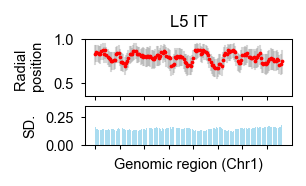

C:\Users\shiwei\AppData\Local\Temp\3\ipykernel_57544\3035626996.py:76: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
meta NOT subset; don't know how to subset; dropped


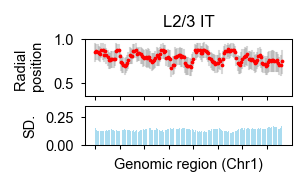

C:\Users\shiwei\AppData\Local\Temp\3\ipykernel_57544\3035626996.py:76: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
meta NOT subset; don't know how to subset; dropped


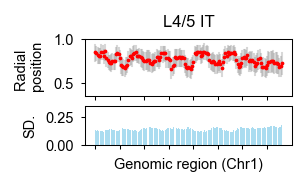

C:\Users\shiwei\AppData\Local\Temp\3\ipykernel_57544\3035626996.py:76: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
meta NOT subset; don't know how to subset; dropped


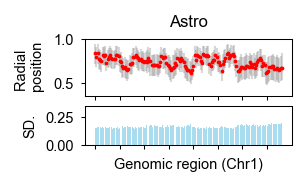

C:\Users\shiwei\AppData\Local\Temp\3\ipykernel_57544\3035626996.py:76: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
meta NOT subset; don't know how to subset; dropped


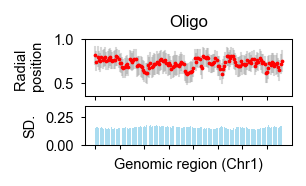

In [20]:
chosen_chrom = '1'
cols_keep = [c for c in sc_ave_radial_df_all.columns if f'chr{chosen_chrom}_' in c]
sc_ave_radial_df_chr = sc_ave_radial_df_all[cols_keep]

# filter by number of loci for the chr
_good_chr_len_th = int(len(cols_keep)/2)
_good_inds = list(np.sum(~np.isnan(sc_ave_radial_df_chr[cols_keep]), axis=1)>= _good_chr_len_th)
sel_sc_ave_radial_df = sc_ave_radial_df_chr.loc[_good_inds , :]

shared_obs = np.intersect1d(sel_sc_ave_radial_df.index, merged_adata.obs.index)
sel_sc_ave_radial_df = sel_sc_ave_radial_df.loc[shared_obs]
sel_merged_adata = merged_adata[shared_obs]

sel_sc_ave_radial_df['celltype'] = sel_merged_adata.obs['subclass_label_new']
sel_sc_ave_radial_df

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import os

for _celltype in ['L5 IT','L2/3 IT','L4/5 IT','Astro','Oligo'][:]:

    sel_df_plot = sel_sc_ave_radial_df[sel_sc_ave_radial_df['celltype']==_celltype]
    sel_df_plot = sel_df_plot[cols_keep]
    _celltype_fname = _celltype.replace('/','_').replace(' ','_')

    fig = plt.figure(figsize=(_page_width/3, _page_width/6), dpi=150)  # Adjusted figure height for two subplots
    gs = gridspec.GridSpec(2, 1, height_ratios=[1.5, 1], hspace=0.2)  # Adjust spacing as needed

    # First subplot for median and confidence intervals
    ax1 = fig.add_subplot(gs[0])
    for i, col in enumerate(sel_df_plot.columns):
        median = sel_df_plot[col].median()
        lower_ci = sel_df_plot[col].quantile(0.25)
        upper_ci = sel_df_plot[col].quantile(0.75)
        ax1.plot([i, i], [lower_ci, upper_ci], color='gray', alpha=0.3, linewidth=1)
        ax1.plot([i - 0.1, i + 0.1], [lower_ci, lower_ci], color='gray', alpha=0.3, linewidth=0.1)
        ax1.plot([i - 0.1, i + 0.1], [upper_ci, upper_ci], color='gray', alpha=0.3, linewidth=0.1)
        ax1.scatter(i, median, color='red', s=1, zorder=5)

    ax1.set_ylabel('Radial \n position', fontsize=7)
    ax1.set_title(_celltype, fontsize=8)
    ax1.grid(False)
    ax1.set_ylim([0.35, 1])
    ax1.tick_params(axis='x', which='major', length=2, width=0.5, labelsize=7)
    ax1.tick_params(axis='y', which='major', length=2, width=0.5, labelsize=7)
    # After configuring ax1, hide its x-axis labels
    # Disable x-axis labels for ax1
    ax1.tick_params(axis='x', labelbottom=False)


    # Second subplot for standard deviation
    ax2 = fig.add_subplot(gs[1], sharex=ax1)
    std_values = sel_df_plot.std()
    ax2.bar(range(len(std_values)), std_values, color='skyblue', alpha=0.7)
    ax2.set_ylabel('SD.', fontsize=7)
    ax2.set_ylim([0, 0.35])

    # Use the same x-axis setup
    ax2.set_xticks(range(0, len(sel_df_plot.columns), 20))
    ax2.set_xticklabels(range(1, len(sel_df_plot.columns) + 1, 20), fontsize=7, rotation=90)
    ax2.tick_params(axis='x', which='major', length=2, width=0.5, labelsize=7)
    ax2.tick_params(axis='y', which='major', length=2, width=0.5, labelsize=7)
    # Disable x-axis labels for ax1
    ax2.tick_params(axis='x', labelbottom=False)

    plt.xlabel(f'Genomic region (Chr{chosen_chrom})', fontsize=7)

    
    # Adjust the spine thickness for each ax
    for _ax in [ax1, ax2]:
        for spine in _ax.spines.values():
            spine.set_linewidth(0.5)

    plt.tight_layout()
    fig.subplots_adjust(left=0.15) 
    # Save the figure with both subplots
    plt.savefig(os.path.join(output_figure_folder, f'radial_chr{chosen_chrom}_{_celltype_fname}_single_cell.pdf'), 
                transparent=True, dpi=300, bbox_inches='tight')

    plt.show()

## load and plot radial position distribution of chr2

C:\Users\shiwei\AppData\Local\Temp\3\ipykernel_57544\784079744.py:76: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
meta NOT subset; don't know how to subset; dropped


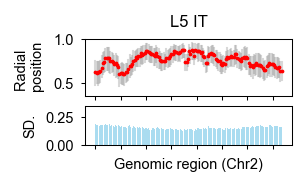

C:\Users\shiwei\AppData\Local\Temp\3\ipykernel_57544\784079744.py:76: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
meta NOT subset; don't know how to subset; dropped


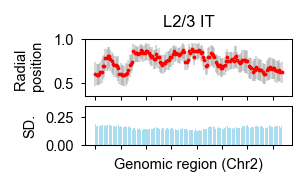

C:\Users\shiwei\AppData\Local\Temp\3\ipykernel_57544\784079744.py:76: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
meta NOT subset; don't know how to subset; dropped


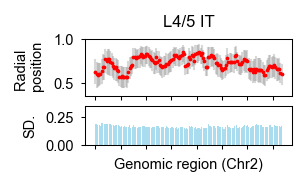

C:\Users\shiwei\AppData\Local\Temp\3\ipykernel_57544\784079744.py:76: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
meta NOT subset; don't know how to subset; dropped


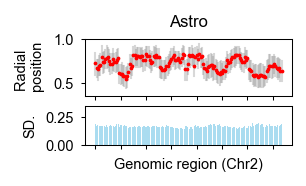

C:\Users\shiwei\AppData\Local\Temp\3\ipykernel_57544\784079744.py:76: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
meta NOT subset; don't know how to subset; dropped


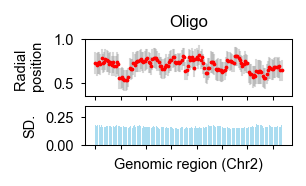

In [18]:
chosen_chrom = '2'
cols_keep = [c for c in sc_ave_radial_df_all.columns if f'chr{chosen_chrom}_' in c]
sc_ave_radial_df_chr = sc_ave_radial_df_all[cols_keep]

# filter by number of loci for the chr
_good_chr_len_th = int(len(cols_keep)/2)
_good_inds = list(np.sum(~np.isnan(sc_ave_radial_df_chr[cols_keep]), axis=1)>= _good_chr_len_th)
sel_sc_ave_radial_df = sc_ave_radial_df_chr.loc[_good_inds , :]

shared_obs = np.intersect1d(sel_sc_ave_radial_df.index, merged_adata.obs.index)
sel_sc_ave_radial_df = sel_sc_ave_radial_df.loc[shared_obs]
sel_merged_adata = merged_adata[shared_obs]

sel_sc_ave_radial_df['celltype'] = sel_merged_adata.obs['subclass_label_new']
sel_sc_ave_radial_df

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import os

for _celltype in ['L5 IT','L2/3 IT','L4/5 IT','Astro','Oligo'][:]:

    sel_df_plot = sel_sc_ave_radial_df[sel_sc_ave_radial_df['celltype']==_celltype]
    sel_df_plot = sel_df_plot[cols_keep]
    _celltype_fname = _celltype.replace('/','_').replace(' ','_')

    fig = plt.figure(figsize=(_page_width/3, _page_width/6), dpi=150)  # Adjusted figure height for two subplots
    gs = gridspec.GridSpec(2, 1, height_ratios=[1.5, 1], hspace=0.2)  # Adjust spacing as needed

    # First subplot for median and confidence intervals
    ax1 = fig.add_subplot(gs[0])
    for i, col in enumerate(sel_df_plot.columns):
        median = sel_df_plot[col].median()
        lower_ci = sel_df_plot[col].quantile(0.25)
        upper_ci = sel_df_plot[col].quantile(0.75)
        ax1.plot([i, i], [lower_ci, upper_ci], color='gray', alpha=0.3, linewidth=1)
        ax1.plot([i - 0.1, i + 0.1], [lower_ci, lower_ci], color='gray', alpha=0.3, linewidth=0.1)
        ax1.plot([i - 0.1, i + 0.1], [upper_ci, upper_ci], color='gray', alpha=0.3, linewidth=0.1)
        ax1.scatter(i, median, color='red', s=1, zorder=5)

    ax1.set_ylabel('Radial \n position', fontsize=7)
    ax1.set_title(_celltype, fontsize=8)
    ax1.grid(False)
    ax1.set_ylim([0.35, 1])
    ax1.tick_params(axis='x', which='major', length=2, width=0.5, labelsize=7)
    ax1.tick_params(axis='y', which='major', length=2, width=0.5, labelsize=7)
    # After configuring ax1, hide its x-axis labels
    # Disable x-axis labels for ax1
    ax1.tick_params(axis='x', labelbottom=False)


    # Second subplot for standard deviation
    ax2 = fig.add_subplot(gs[1], sharex=ax1)
    std_values = sel_df_plot.std()
    ax2.bar(range(len(std_values)), std_values, color='skyblue', alpha=0.7)
    ax2.set_ylabel('SD.', fontsize=7)
    ax2.set_ylim([0, 0.35])

    # Use the same x-axis setup
    ax2.set_xticks(range(0, len(sel_df_plot.columns), 20))
    ax2.set_xticklabels(range(1, len(sel_df_plot.columns) + 1, 20), fontsize=7, rotation=90)
    ax2.tick_params(axis='x', which='major', length=2, width=0.5, labelsize=7)
    ax2.tick_params(axis='y', which='major', length=2, width=0.5, labelsize=7)
    # Disable x-axis labels for ax1
    ax2.tick_params(axis='x', labelbottom=False)

    plt.xlabel(f'Genomic region (Chr{chosen_chrom})', fontsize=7)

    
    # Adjust the spine thickness for each ax
    for _ax in [ax1, ax2]:
        for spine in _ax.spines.values():
            spine.set_linewidth(0.5)

    plt.tight_layout()
    fig.subplots_adjust(left=0.15) 
    # Save the figure with both subplots
    plt.savefig(os.path.join(output_figure_folder, f'radial_chr{chosen_chrom}_{_celltype_fname}_single_cell.pdf'), 
                transparent=True, dpi=300, bbox_inches='tight')

    plt.show()

## load and plot radial position distribution of chr7

C:\Users\shiwei\AppData\Local\Temp\3\ipykernel_57544\2265857824.py:76: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
meta NOT subset; don't know how to subset; dropped


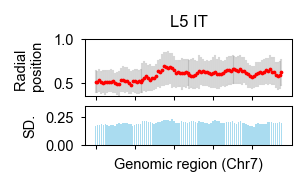

C:\Users\shiwei\AppData\Local\Temp\3\ipykernel_57544\2265857824.py:76: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
meta NOT subset; don't know how to subset; dropped


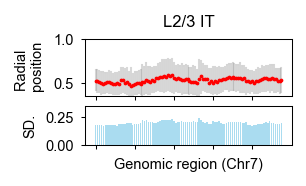

C:\Users\shiwei\AppData\Local\Temp\3\ipykernel_57544\2265857824.py:76: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
meta NOT subset; don't know how to subset; dropped


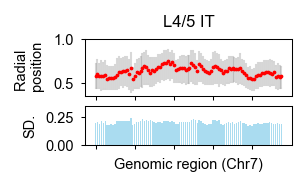

C:\Users\shiwei\AppData\Local\Temp\3\ipykernel_57544\2265857824.py:76: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
meta NOT subset; don't know how to subset; dropped


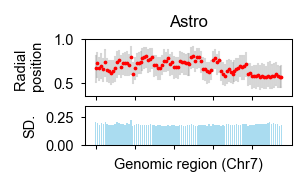

C:\Users\shiwei\AppData\Local\Temp\3\ipykernel_57544\2265857824.py:76: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
meta NOT subset; don't know how to subset; dropped


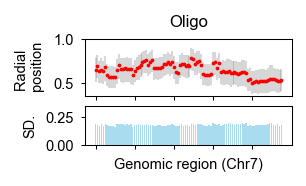

In [19]:
chosen_chrom = '7'
cols_keep = [c for c in sc_ave_radial_df_all.columns if f'chr{chosen_chrom}_' in c]
sc_ave_radial_df_chr = sc_ave_radial_df_all[cols_keep]

# filter by number of loci for the chr
_good_chr_len_th = int(len(cols_keep)/2)
_good_inds = list(np.sum(~np.isnan(sc_ave_radial_df_chr[cols_keep]), axis=1)>= _good_chr_len_th)
sel_sc_ave_radial_df = sc_ave_radial_df_chr.loc[_good_inds , :]

shared_obs = np.intersect1d(sel_sc_ave_radial_df.index, merged_adata.obs.index)
sel_sc_ave_radial_df = sel_sc_ave_radial_df.loc[shared_obs]
sel_merged_adata = merged_adata[shared_obs]

sel_sc_ave_radial_df['celltype'] = sel_merged_adata.obs['subclass_label_new']
sel_sc_ave_radial_df

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import os

for _celltype in ['L5 IT','L2/3 IT','L4/5 IT','Astro','Oligo'][:]:

    sel_df_plot = sel_sc_ave_radial_df[sel_sc_ave_radial_df['celltype']==_celltype]
    sel_df_plot = sel_df_plot[cols_keep]
    _celltype_fname = _celltype.replace('/','_').replace(' ','_')

    fig = plt.figure(figsize=(_page_width/3, _page_width/6), dpi=150)  # Adjusted figure height for two subplots
    gs = gridspec.GridSpec(2, 1, height_ratios=[1.5, 1], hspace=0.2)  # Adjust spacing as needed

    # First subplot for median and confidence intervals
    ax1 = fig.add_subplot(gs[0])
    for i, col in enumerate(sel_df_plot.columns):
        median = sel_df_plot[col].median()
        lower_ci = sel_df_plot[col].quantile(0.25)
        upper_ci = sel_df_plot[col].quantile(0.75)
        ax1.plot([i, i], [lower_ci, upper_ci], color='gray', alpha=0.3, linewidth=1)
        ax1.plot([i - 0.1, i + 0.1], [lower_ci, lower_ci], color='gray', alpha=0.3, linewidth=0.1)
        ax1.plot([i - 0.1, i + 0.1], [upper_ci, upper_ci], color='gray', alpha=0.3, linewidth=0.1)
        ax1.scatter(i, median, color='red', s=1, zorder=5)

    ax1.set_ylabel('Radial \n position', fontsize=7)
    ax1.set_title(_celltype, fontsize=8)
    ax1.grid(False)
    ax1.set_ylim([0.35, 1])
    ax1.tick_params(axis='x', which='major', length=2, width=0.5, labelsize=7)
    ax1.tick_params(axis='y', which='major', length=2, width=0.5, labelsize=7)
    # After configuring ax1, hide its x-axis labels
    # Disable x-axis labels for ax1
    ax1.tick_params(axis='x', labelbottom=False)


    # Second subplot for standard deviation
    ax2 = fig.add_subplot(gs[1], sharex=ax1)
    std_values = sel_df_plot.std()
    ax2.bar(range(len(std_values)), std_values, color='skyblue', alpha=0.7)
    ax2.set_ylabel('SD.', fontsize=7)
    ax2.set_ylim([0, 0.35])

    # Use the same x-axis setup
    ax2.set_xticks(range(0, len(sel_df_plot.columns), 20))
    ax2.set_xticklabels(range(1, len(sel_df_plot.columns) + 1, 20), fontsize=7, rotation=90)
    ax2.tick_params(axis='x', which='major', length=2, width=0.5, labelsize=7)
    ax2.tick_params(axis='y', which='major', length=2, width=0.5, labelsize=7)
    # Disable x-axis labels for ax1
    ax2.tick_params(axis='x', labelbottom=False)

    plt.xlabel(f'Genomic region (Chr{chosen_chrom})', fontsize=7)

    
    # Adjust the spine thickness for each ax
    for _ax in [ax1, ax2]:
        for spine in _ax.spines.values():
            spine.set_linewidth(0.5)

    plt.tight_layout()
    fig.subplots_adjust(left=0.15) 
    # Save the figure with both subplots
    plt.savefig(os.path.join(output_figure_folder, f'radial_chr{chosen_chrom}_{_celltype_fname}_single_cell.pdf'), 
                transparent=True, dpi=300, bbox_inches='tight')

    plt.show()

## load and plot radial position distribution of chr11

C:\Users\shiwei\AppData\Local\Temp\3\ipykernel_57544\2008796795.py:76: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
meta NOT subset; don't know how to subset; dropped


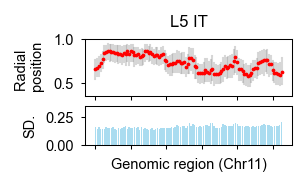

C:\Users\shiwei\AppData\Local\Temp\3\ipykernel_57544\2008796795.py:76: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
meta NOT subset; don't know how to subset; dropped


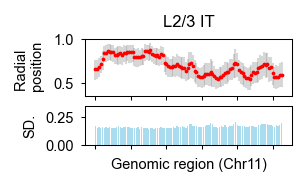

C:\Users\shiwei\AppData\Local\Temp\3\ipykernel_57544\2008796795.py:76: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
meta NOT subset; don't know how to subset; dropped


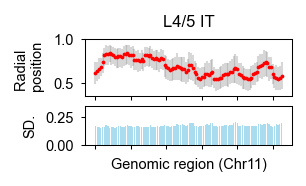

C:\Users\shiwei\AppData\Local\Temp\3\ipykernel_57544\2008796795.py:76: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
meta NOT subset; don't know how to subset; dropped


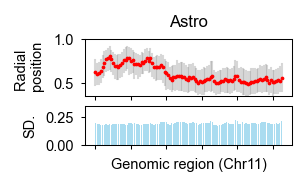

C:\Users\shiwei\AppData\Local\Temp\3\ipykernel_57544\2008796795.py:76: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
meta NOT subset; don't know how to subset; dropped


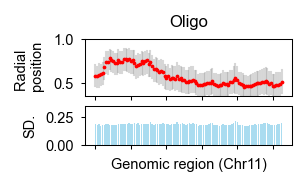

In [21]:
chosen_chrom = '11'
cols_keep = [c for c in sc_ave_radial_df_all.columns if f'chr{chosen_chrom}_' in c]
sc_ave_radial_df_chr = sc_ave_radial_df_all[cols_keep]

# filter by number of loci for the chr
_good_chr_len_th = int(len(cols_keep)/2)
_good_inds = list(np.sum(~np.isnan(sc_ave_radial_df_chr[cols_keep]), axis=1)>= _good_chr_len_th)
sel_sc_ave_radial_df = sc_ave_radial_df_chr.loc[_good_inds , :]

shared_obs = np.intersect1d(sel_sc_ave_radial_df.index, merged_adata.obs.index)
sel_sc_ave_radial_df = sel_sc_ave_radial_df.loc[shared_obs]
sel_merged_adata = merged_adata[shared_obs]

sel_sc_ave_radial_df['celltype'] = sel_merged_adata.obs['subclass_label_new']
sel_sc_ave_radial_df

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import os

for _celltype in ['L5 IT','L2/3 IT','L4/5 IT','Astro','Oligo'][:]:

    sel_df_plot = sel_sc_ave_radial_df[sel_sc_ave_radial_df['celltype']==_celltype]
    sel_df_plot = sel_df_plot[cols_keep]
    _celltype_fname = _celltype.replace('/','_').replace(' ','_')

    fig = plt.figure(figsize=(_page_width/3, _page_width/6), dpi=150)  # Adjusted figure height for two subplots
    gs = gridspec.GridSpec(2, 1, height_ratios=[1.5, 1], hspace=0.2)  # Adjust spacing as needed

    # First subplot for median and confidence intervals
    ax1 = fig.add_subplot(gs[0])
    for i, col in enumerate(sel_df_plot.columns):
        median = sel_df_plot[col].median()
        lower_ci = sel_df_plot[col].quantile(0.25)
        upper_ci = sel_df_plot[col].quantile(0.75)
        ax1.plot([i, i], [lower_ci, upper_ci], color='gray', alpha=0.3, linewidth=1)
        ax1.plot([i - 0.1, i + 0.1], [lower_ci, lower_ci], color='gray', alpha=0.3, linewidth=0.1)
        ax1.plot([i - 0.1, i + 0.1], [upper_ci, upper_ci], color='gray', alpha=0.3, linewidth=0.1)
        ax1.scatter(i, median, color='red', s=1, zorder=5)

    ax1.set_ylabel('Radial \n position', fontsize=7)
    ax1.set_title(_celltype, fontsize=8)
    ax1.grid(False)
    ax1.set_ylim([0.35, 1])
    ax1.tick_params(axis='x', which='major', length=2, width=0.5, labelsize=7)
    ax1.tick_params(axis='y', which='major', length=2, width=0.5, labelsize=7)
    # After configuring ax1, hide its x-axis labels
    # Disable x-axis labels for ax1
    ax1.tick_params(axis='x', labelbottom=False)


    # Second subplot for standard deviation
    ax2 = fig.add_subplot(gs[1], sharex=ax1)
    std_values = sel_df_plot.std()
    ax2.bar(range(len(std_values)), std_values, color='skyblue', alpha=0.7)
    ax2.set_ylabel('SD.', fontsize=7)
    ax2.set_ylim([0, 0.35])

    # Use the same x-axis setup
    ax2.set_xticks(range(0, len(sel_df_plot.columns), 20))
    ax2.set_xticklabels(range(1, len(sel_df_plot.columns) + 1, 20), fontsize=7, rotation=90)
    ax2.tick_params(axis='x', which='major', length=2, width=0.5, labelsize=7)
    ax2.tick_params(axis='y', which='major', length=2, width=0.5, labelsize=7)
    # Disable x-axis labels for ax1
    ax2.tick_params(axis='x', labelbottom=False)

    plt.xlabel(f'Genomic region (Chr{chosen_chrom})', fontsize=7)

    
    # Adjust the spine thickness for each ax
    for _ax in [ax1, ax2]:
        for spine in _ax.spines.values():
            spine.set_linewidth(0.5)

    plt.tight_layout()
    fig.subplots_adjust(left=0.15) 
    # Save the figure with both subplots
    plt.savefig(os.path.join(output_figure_folder, f'radial_chr{chosen_chrom}_{_celltype_fname}_single_cell.pdf'), 
                transparent=True, dpi=300, bbox_inches='tight')

    plt.show()

# Plot correlation of median of radial position and SD

In [77]:
import pandas as pd
import numpy as np
from tqdm.auto import tqdm  


chrom_list = [c for c in np.unique(codebook_df['chr']) if c!= 'Y']
chrom_list = [c for c in chrom_list  if c!='X']
chrom_list.sort(key = int)
chrom_list.append('X')


analysis_df_fname = os.path.join(output_analysis_folder, f'radial_single_cell_allLoci_{_ext}kb_median_and_SD.csv')

if os.path.exists(analysis_df_fname):
    radial_medians_and_std = pd.read_csv(analysis_df_fname, index_col=0)
    print("Load radial data")
    
else:    
    # Initialize an empty dictionary to store results
    radial_medians_and_std = {'celltype':[], 'chromosome':[], 'radial_postion_median':[], 'radial_postion_std':[]}

    for chosen_chrom in chrom_list[:]:
        radial_chr_fname = os.path.join(output_analysis_folder, 
                                        'radial_pos_byChr_from_temp', 
                                        f'Chr{chosen_chrom}_single_cell_radial_position.h5')
        _loci_name_list = codebook_df[codebook_df['chr']==chosen_chrom].index.tolist()
        if os.path.exists(radial_chr_fname):
            print('Loading')
            sc_radial_df = pd.read_hdf(radial_chr_fname, index_col=0)

            # Initialize an empty dictionary to store average values
            averaged_columns = {}
            # Use tqdm to show progress over columns
            for column_name in tqdm(sc_radial_df.columns, desc="Calculating medians"):
                # Calculate the median for each cell assuming each cell contains an iterable
                averaged_columns[f"{column_name}_ave"] = sc_radial_df[column_name].apply(lambda x: np.nanmedian(x) 
                                                                                         if isinstance(x, (list, np.ndarray)) else x)

            # Create a new DataFrame from the averaged columns dictionary
            sc_ave_radial_df = pd.DataFrame(averaged_columns)
            sc_ave_radial_df.index = sc_radial_df.index
            
            # filter by number of loci for the chr
            _good_chr_len_th = int(len(sc_radial_df.columns)/2)
            _good_inds = list(np.sum(~np.isnan(sc_ave_radial_df), axis=1)>= _good_chr_len_th)
            good_sc_ave_radial_df = sc_ave_radial_df.loc[_good_inds , :]
            
            # append celltype information
            shared_obs = np.intersect1d(good_sc_ave_radial_df.index, merged_adata.obs.index)
            good_sc_ave_radial_df = good_sc_ave_radial_df.loc[shared_obs]
            sel_merged_adata = merged_adata[shared_obs]

            good_sc_ave_radial_df['celltype'] = sel_merged_adata.obs['subclass_label_new']

            # Calculate median and std at chromosome level for each celltype
            for _celltype in selected_cell_labels[:]:
                sel_df = good_sc_ave_radial_df[good_sc_ave_radial_df['celltype']==_celltype]
                cols_keep = [c for c in sc_ave_radial_df_all.columns if f'chr{chosen_chrom}_' in c]
                sel_df = sel_df[cols_keep]

                chr_median = np.nanmedian(sel_df)
                chr_std_values = np.nanstd(sel_df)

                radial_medians_and_std['radial_postion_median'].append(chr_median)
                radial_medians_and_std['radial_postion_std'].append(chr_std_values)
                radial_medians_and_std['celltype'].append(_celltype)
                radial_medians_and_std['chromosome'].append(chosen_chrom)


    radial_medians_and_std = pd.DataFrame(radial_medians_and_std)
    radial_medians_and_std.to_csv(analysis_df_fname)

Loading


Calculating medians:   0%|                                                                     | 0/153 [00:00<?, ?it/s]C:\Users\shiwei\Anaconda3\envs\shiwei_chromatin\lib\site-packages\numpy\lib\nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
Calculating medians: 100%|███████████████████████████████████████████████████████████| 153/153 [01:37<00:00,  1.57it/s]


Loading


Calculating medians:   0%|                                                                     | 0/148 [00:00<?, ?it/s]C:\Users\shiwei\Anaconda3\envs\shiwei_chromatin\lib\site-packages\numpy\lib\nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
Calculating medians: 100%|███████████████████████████████████████████████████████████| 148/148 [01:31<00:00,  1.61it/s]


Loading


Calculating medians:   0%|                                                                     | 0/123 [00:00<?, ?it/s]C:\Users\shiwei\Anaconda3\envs\shiwei_chromatin\lib\site-packages\numpy\lib\nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
Calculating medians: 100%|███████████████████████████████████████████████████████████| 123/123 [01:22<00:00,  1.50it/s]


Loading


Calculating medians:   0%|                                                                     | 0/122 [00:00<?, ?it/s]C:\Users\shiwei\Anaconda3\envs\shiwei_chromatin\lib\site-packages\numpy\lib\nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
Calculating medians: 100%|███████████████████████████████████████████████████████████| 122/122 [01:23<00:00,  1.46it/s]


Loading


Calculating medians:   0%|                                                                     | 0/119 [00:00<?, ?it/s]C:\Users\shiwei\Anaconda3\envs\shiwei_chromatin\lib\site-packages\numpy\lib\nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
Calculating medians: 100%|███████████████████████████████████████████████████████████| 119/119 [01:17<00:00,  1.53it/s]


Loading


Calculating medians:   0%|                                                                     | 0/114 [00:00<?, ?it/s]C:\Users\shiwei\Anaconda3\envs\shiwei_chromatin\lib\site-packages\numpy\lib\nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
Calculating medians: 100%|███████████████████████████████████████████████████████████| 114/114 [01:12<00:00,  1.57it/s]


Loading


Calculating medians:   0%|                                                                      | 0/96 [00:00<?, ?it/s]C:\Users\shiwei\Anaconda3\envs\shiwei_chromatin\lib\site-packages\numpy\lib\nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
Calculating medians: 100%|█████████████████████████████████████████████████████████████| 96/96 [01:00<00:00,  1.59it/s]


Loading


Calculating medians:   0%|                                                                     | 0/102 [00:00<?, ?it/s]C:\Users\shiwei\Anaconda3\envs\shiwei_chromatin\lib\site-packages\numpy\lib\nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
Calculating medians: 100%|███████████████████████████████████████████████████████████| 102/102 [01:07<00:00,  1.51it/s]


Loading


Calculating medians:   0%|                                                                     | 0/102 [00:00<?, ?it/s]C:\Users\shiwei\Anaconda3\envs\shiwei_chromatin\lib\site-packages\numpy\lib\nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
Calculating medians: 100%|███████████████████████████████████████████████████████████| 102/102 [01:03<00:00,  1.60it/s]


Loading


Calculating medians:   0%|                                                                     | 0/117 [00:00<?, ?it/s]C:\Users\shiwei\Anaconda3\envs\shiwei_chromatin\lib\site-packages\numpy\lib\nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
Calculating medians: 100%|███████████████████████████████████████████████████████████| 117/117 [01:20<00:00,  1.46it/s]


Loading


Calculating medians:   0%|                                                                     | 0/106 [00:00<?, ?it/s]C:\Users\shiwei\Anaconda3\envs\shiwei_chromatin\lib\site-packages\numpy\lib\nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
Calculating medians: 100%|███████████████████████████████████████████████████████████| 106/106 [01:09<00:00,  1.52it/s]


Loading


Calculating medians:   0%|                                                                      | 0/78 [00:00<?, ?it/s]C:\Users\shiwei\Anaconda3\envs\shiwei_chromatin\lib\site-packages\numpy\lib\nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
Calculating medians: 100%|█████████████████████████████████████████████████████████████| 78/78 [00:50<00:00,  1.55it/s]


Loading


Calculating medians:   0%|                                                                      | 0/92 [00:00<?, ?it/s]C:\Users\shiwei\Anaconda3\envs\shiwei_chromatin\lib\site-packages\numpy\lib\nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
Calculating medians: 100%|█████████████████████████████████████████████████████████████| 92/92 [00:59<00:00,  1.54it/s]


Loading


Calculating medians:   0%|                                                                      | 0/94 [00:00<?, ?it/s]C:\Users\shiwei\Anaconda3\envs\shiwei_chromatin\lib\site-packages\numpy\lib\nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
Calculating medians: 100%|█████████████████████████████████████████████████████████████| 94/94 [00:59<00:00,  1.59it/s]


Loading


Calculating medians:   0%|                                                                      | 0/78 [00:00<?, ?it/s]C:\Users\shiwei\Anaconda3\envs\shiwei_chromatin\lib\site-packages\numpy\lib\nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
Calculating medians: 100%|█████████████████████████████████████████████████████████████| 78/78 [00:50<00:00,  1.55it/s]


Loading


Calculating medians:   0%|                                                                      | 0/76 [00:00<?, ?it/s]C:\Users\shiwei\Anaconda3\envs\shiwei_chromatin\lib\site-packages\numpy\lib\nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
Calculating medians: 100%|█████████████████████████████████████████████████████████████| 76/76 [00:48<00:00,  1.58it/s]


Loading


Calculating medians:   0%|                                                                      | 0/70 [00:00<?, ?it/s]C:\Users\shiwei\Anaconda3\envs\shiwei_chromatin\lib\site-packages\numpy\lib\nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
Calculating medians: 100%|█████████████████████████████████████████████████████████████| 70/70 [00:43<00:00,  1.59it/s]


Loading


Calculating medians:   0%|                                                                      | 0/68 [00:00<?, ?it/s]C:\Users\shiwei\Anaconda3\envs\shiwei_chromatin\lib\site-packages\numpy\lib\nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
Calculating medians: 100%|█████████████████████████████████████████████████████████████| 68/68 [00:44<00:00,  1.53it/s]


Loading


Calculating medians:   0%|                                                                      | 0/59 [00:00<?, ?it/s]C:\Users\shiwei\Anaconda3\envs\shiwei_chromatin\lib\site-packages\numpy\lib\nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
Calculating medians: 100%|█████████████████████████████████████████████████████████████| 59/59 [00:37<00:00,  1.58it/s]


Loading


Calculating medians:   0%|                                                                      | 0/64 [00:00<?, ?it/s]C:\Users\shiwei\Anaconda3\envs\shiwei_chromatin\lib\site-packages\numpy\lib\nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
Calculating medians: 100%|█████████████████████████████████████████████████████████████| 64/64 [00:27<00:00,  2.35it/s]


In [79]:
radial_medians_and_std.head(10)

,celltype,chromosome,radial_postion_median,radial_postion_std
0,L2/3 IT,1,0.787845,0.145080
1,L4/5 IT,1,0.767156,0.149984
2,L5 IT,1,0.789753,0.151355
3,L6 IT,1,0.779597,0.146312
4,L5 ET,1,0.812787,0.152941
5,L5/6 NP,1,0.779975,0.144223
6,L6 CT,1,0.765785,0.152546
7,L6b,1,0.767071,0.152043
8,Sst,1,0.786269,0.146641
9,Pvalb,1,0.789491,0.149711


## plot scatter of median and SD for given cell type

meta NOT subset; don't know how to subset; dropped


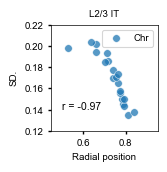

meta NOT subset; don't know how to subset; dropped


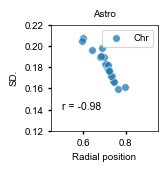

meta NOT subset; don't know how to subset; dropped


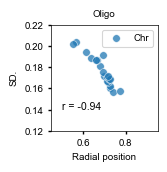

In [80]:
from scipy.stats import spearmanr
import seaborn as sns

for _celltype in ['L2/3 IT','Astro','Oligo'][:]:
    df_byCelltype = radial_medians_and_std[radial_medians_and_std['celltype'] == _celltype]
    
    # Creating the plot
    fig, ax = plt.subplots(figsize=(_page_width/4, _page_width/4))  # Adjust figure size as needed
    
    x = 'radial_postion_median'
    y = 'radial_postion_std'
    sns.scatterplot(data = df_byCelltype, x=x, y=y,label='Chr', s=30, alpha=0.75)

    # Adding titles and labels with adjusted font size
    #ax.set_title('Correlation between medians of \n chromosome radial position and std', fontsize=7)
    ax.set_title(f'{_celltype}', fontsize=7)
    ax.set_xlabel('Radial position', fontsize=7)
    ax.set_ylabel('SD.', fontsize=7)

    # Setting x-ticks and adjusting tick parameters
    #ax.set_xticklabels(rotation=90, ha="center", fontsize=7)  # Adjust font size for x-tick labels
    ax.tick_params(axis='both', labelsize=7)  # Adjust font size for y-tick labels
    ax.tick_params(axis='both', length=2)  # Adjust tick length for both axes

    # Adjusting y-axis limits correctly for negative correlations
    plt.ylim([0.12, 0.22])
    plt.xlim([0.45, 0.95])
    corr, p_value = spearmanr(df_byCelltype[x], df_byCelltype[y])
    ax.text(0.5, 0.14, f'r = {round(corr,2)}')
    
    # Adding the legend with a smaller font size
    ax.legend(fontsize=7)  # Adjusting the font size to make the legend label smaller
    
    for spine in ax.spines.values():
        spine.set_linewidth(0.5)

    # Save the figure
    _celltype_fname = _celltype.replace(' ','_').replace('/','_')
    pdf_path = os.path.join(output_figure_folder, f'radial_position_corr_median_vs_sd_chr_{_celltype_fname}.pdf')
    plt.savefig(pdf_path, transparent=True, dpi=300, bbox_inches='tight')

    # Display the plot
    plt.show()

    # Close the plot to free memory
    #plt.close()
    

## plot correlation summary for all celltypes

In [81]:
from scipy.stats import spearmanr

corr_dict_byCelltype = {}

for _celltype in selected_cell_labels:
    df_byCelltype = radial_medians_and_std[radial_medians_and_std['celltype'] == _celltype]
    x = df_byCelltype['radial_postion_median']
    y = df_byCelltype['radial_postion_std']
    corr, p_value = spearmanr(x, y)
    corr_dict_byCelltype[_celltype] = corr
    
corr_dict_byCelltype    

{'L2/3 IT': -0.9744360902255638,
 'L4/5 IT': -0.9578947368421054,
 'L5 IT': -0.9593984962406013,
 'L6 IT': -0.9699248120300751,
 'L5 ET': -0.8932330827067668,
 'L5/6 NP': -0.8932330827067668,
 'L6 CT': -0.9654135338345864,
 'L6b': -0.9654135338345864,
 'Sst': -0.8090225563909773,
 'Pvalb': -0.9263157894736842,
 'Lamp5': -0.8977443609022555,
 'Sncg': -0.8285714285714285,
 'Vip': -0.7458646616541353,
 'Astro': -0.9819548872180449,
 'Oligo': -0.9368421052631578,
 'OPC': -0.8781954887218045,
 'Micro': -0.8872180451127819,
 'Endo': -0.9082706766917292,
 'VLMC': -0.6872180451127818,
 'SMC': -0.8150375939849623,
 'Peri': -0.9052631578947368}

meta NOT subset; don't know how to subset; dropped


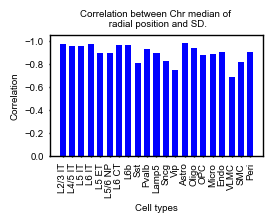

In [82]:
import matplotlib.pyplot as plt
import os

# Extracting keys and values
keys = list(corr_dict_byCelltype.keys())
values = list(corr_dict_byCelltype.values())

# Creating the plot
fig, ax = plt.subplots(figsize=(_page_width/2, _page_width/3.5))  # Adjust figure size as needed

# Plotting bars with colors from the palette
for _key, _value in zip(keys, values):
    #ax.bar(_key, _value, color=celltype_palette[_key], width=0.65)
    ax.bar(_key, _value, color='blue', width=0.65)

# Adding titles and labels with adjusted font size
ax.set_title('Correlation between Chr median of \n radial position and SD.', fontsize=7)
ax.set_xlabel('Cell types', fontsize=7)
ax.set_ylabel('Correlation', fontsize=7)

# Setting x-ticks and adjusting tick parameters
ax.set_xticks(range(len(keys)))
ax.set_xticklabels(keys, rotation=90, ha="center", fontsize=7)  # Adjust font size for x-tick labels
ax.tick_params(axis='y', labelsize=7)  # Adjust font size for y-tick labels
ax.tick_params(axis='both', length=1)  # Adjust tick length for both axes

# Adjusting y-axis limits correctly for negative correlations
plt.ylim([0, -1.05])

# Save the figure
pdf_path = os.path.join(output_figure_folder, 'radial_position_corr_median_vs_sd_barplot.pdf')
plt.savefig(pdf_path, transparent=True, dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

# Close the plot to free memory
plt.close()
